# Assignment 4 : Decision Tree

The Car Evaluation Database was derived from a simple hierarchical decision model. The prediction task is to classify a car based on its safety.

Data Set Information:

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
- PRICE overall price
- . . buying buying price
- . . maint price of the maintenance
- TECH technical characteristics
- . . COMFORT comfort
- . . . doors number of doors
- . . . persons capacity in terms of persons to carry
- . . . lug_boot the size of luggage boot
- . . safety estimated safety of the car

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from scipy.stats import chi2_contingency
from matplotlib.ticker import FuncFormatter

import seaborn as sns
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

df = pd.read_excel("car_evaluation.xlsx", names=['price', 'maintenance', 'no_of_doors',  'seat', 'boot_space','safety','class'], header=None)
df

,price,maintenance,no_of_doors,seat,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
df.replace({'class': {"unacc": 1, "acc": 2, "good": 3, "vgood": 4}}, inplace=True)
df.replace({'price': {"low": 1, "med": 2, "high": 3, "vhigh": 4}}, inplace=True)
df.replace({'no_of_doors': {"5more": 5}}, inplace=True)
df.replace({'seat': {"more": 5}}, inplace=True)
df.replace({'maintenance': {"low": 1, "med": 2, "high": 3, "vhigh": 4}}, inplace=True)
df.replace({'boot_space': {"small": 1, "med": 2, "big": 3}}, inplace=True)
df.replace({'safety': {"low": 1, "med": 2, "high": 3}}, inplace=True)

In [3]:
df.replace({'target': {"unacc": 1, "acc": 2, "good": 3, "vgood": 4}}, inplace=True)

## Data Visualization

### No of doors

Text(0, 0.5, 'Count')

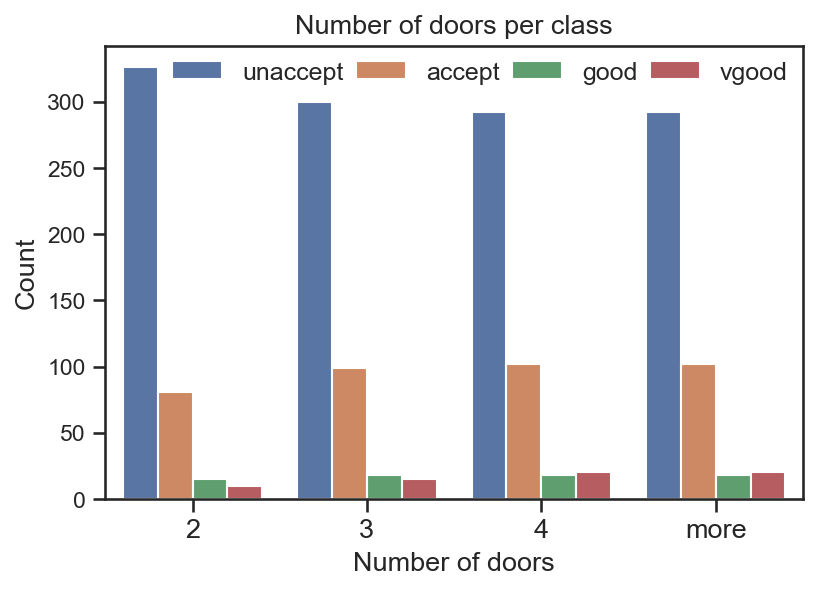

In [4]:
ax = sns.countplot(x='no_of_doors', hue="class", data=df)
plt.xticks(rotation=0, fontsize=13)
plt.title('Number of doors per class',fontsize=13)
plt.legend(["unaccept","accept","good",'vgood'], borderpad = 0.1,  columnspacing=0.5, labelspacing = 0,loc="upper right",fontsize=12, ncol=4, frameon=False)
ax.set_xticklabels(['2','3','4','more'],size =13, rotation=0)
plt.xlabel('Number of doors',fontsize=13)
plt.ylabel('Count',fontsize=13)

Text(0, 0.5, 'Count')

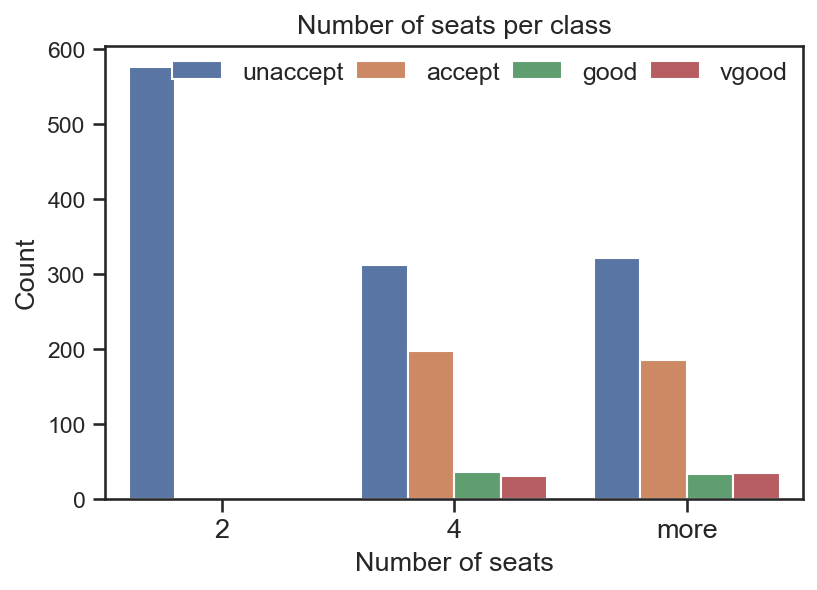

In [5]:
ax = sns.countplot(x='seat', hue="class", data=df)
plt.xticks(rotation=0, fontsize=13)
plt.title('Number of seats per class',fontsize=13)
plt.legend(["unaccept","accept","good",'vgood'], borderpad = 0.1,  columnspacing=0.5, labelspacing = 0,loc="upper right",fontsize=12, ncol=4, frameon=False)
ax.set_xticklabels(['2','4','more'],size =13, rotation=0)
plt.xlabel('Number of seats',fontsize=13)
plt.ylabel('Count',fontsize=13)

Text(0, 0.5, 'Count')

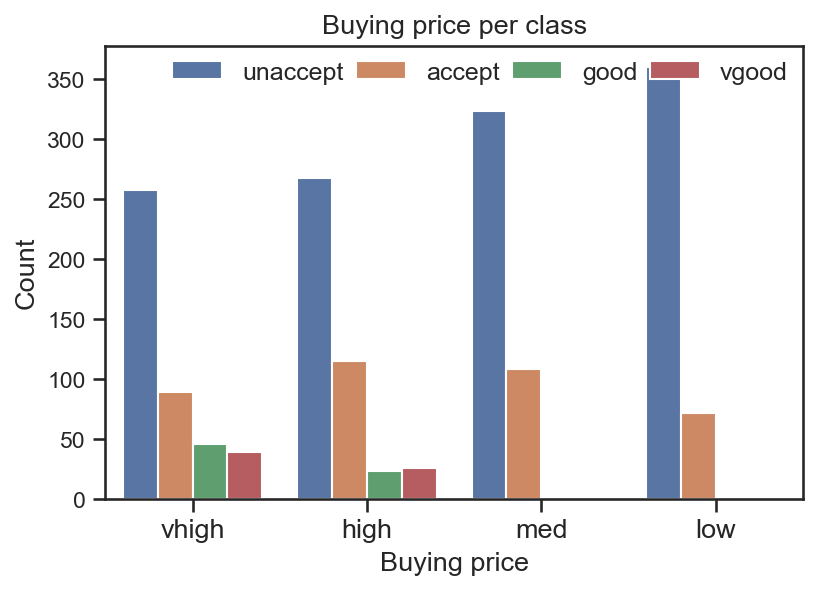

In [6]:
ax = sns.countplot(x='price', hue="class", data=df)
plt.xticks(rotation=0, fontsize=13)
plt.title('Buying price per class',fontsize=13)
plt.legend(["unaccept","accept","good",'vgood'], borderpad = 0.1,  columnspacing=0.5, labelspacing = 0,loc="upper right",fontsize=12, ncol=4, frameon=False)
plt.xlabel('Buying price',fontsize=13)
ax.set_xticklabels(['vhigh','high','med','low'],size =13, rotation=0)
plt.ylabel('Count',fontsize=13)

Text(0, 0.5, 'Count')

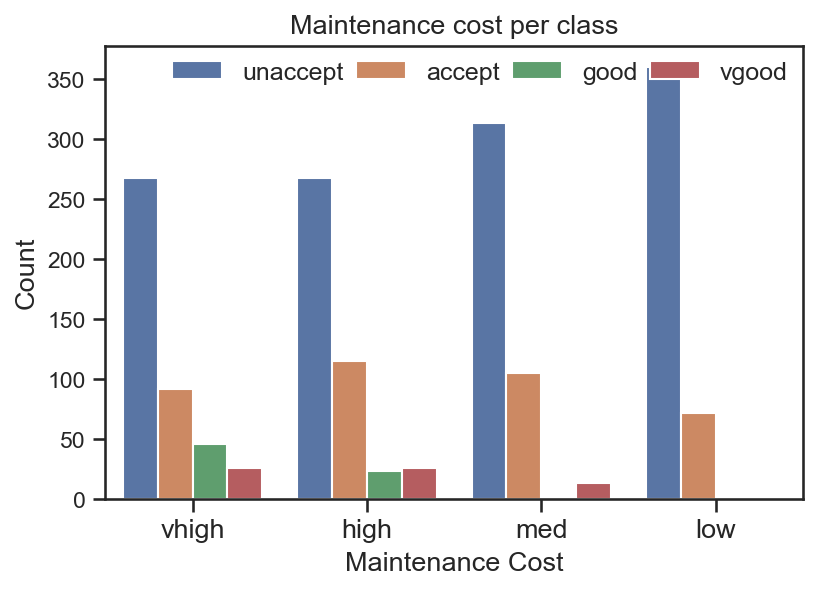

In [7]:
ax = sns.countplot(x='maintenance', hue="class", data=df)
plt.xticks(rotation=0, fontsize=13)
plt.title('Maintenance cost per class',fontsize=13)
ax.set_xticklabels(['vhigh','high','med','low'],size =13, rotation=0)
plt.legend(["unaccept","accept","good",'vgood'], borderpad = 0.1,  columnspacing=0.5, labelspacing = 0,loc="upper right",fontsize=12, ncol=4, frameon=False)
plt.xlabel('Maintenance Cost',fontsize=13)
plt.ylabel('Count',fontsize=13)

Text(0, 0.5, 'Count')

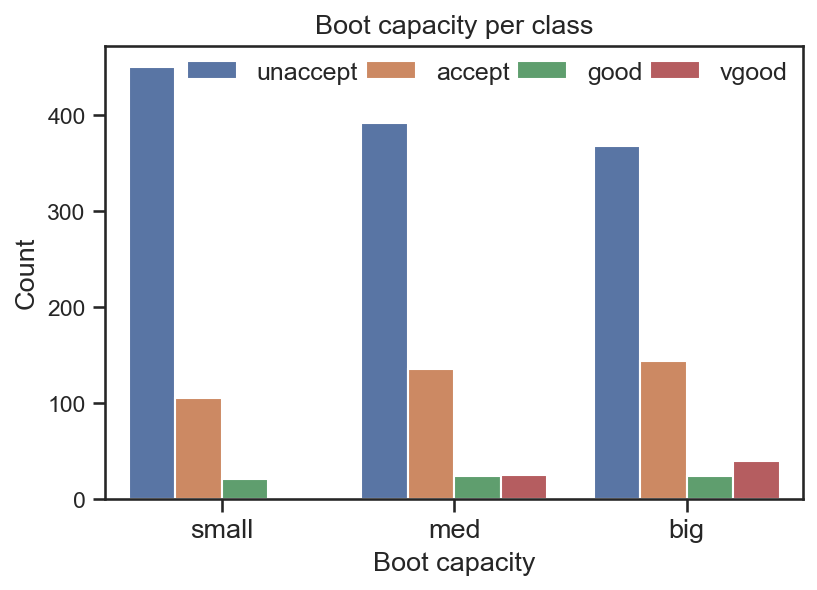

In [8]:
ax =sns.countplot(x='boot_space', hue="class", data=df)
plt.xticks(rotation=0, fontsize=13)
plt.title('Boot capacity per class',fontsize=13)
plt.legend(["unaccept","accept","good",'vgood'], borderpad = 0.1,  columnspacing=0.3, labelspacing = 0,loc="upper right",fontsize=12, ncol=4, frameon=False)
ax.set_xticklabels(['small','med','big'],size =13, rotation=0)
plt.xlabel('Boot capacity',fontsize=13)
plt.ylabel('Count',fontsize=13)

Text(0, 0.5, 'Count')

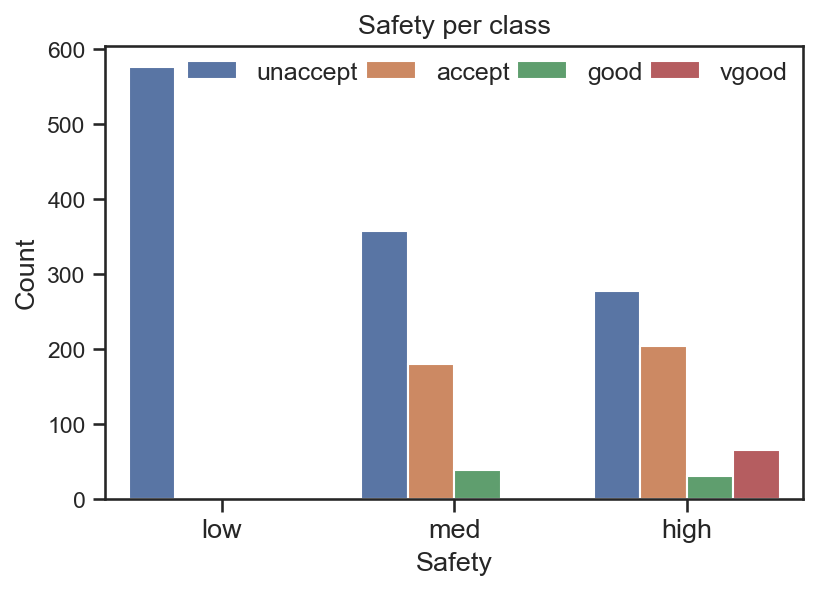

In [9]:
ax = sns.countplot(x='safety', hue="class", data=df)
plt.xticks(rotation=0, fontsize=13)
plt.title('Safety per class',fontsize=13)
plt.legend(["unaccept","accept","good",'vgood'], borderpad = 0.1,  columnspacing=0.3, labelspacing = 0,loc="upper right",fontsize=12, ncol=4, frameon=False)
ax.set_xticklabels(['low','med','high'],size =13, rotation=0)
plt.xlabel('Safety',fontsize=13)
plt.ylabel('Count',fontsize=13)

## Check null values and duplicates

In [10]:
df.isnull().sum() 

price          0
maintenance    0
no_of_doors    0
seat           0
boot_space     0
safety         0
class          0
dtype: int64

In [11]:
df = df.drop_duplicates()

In [12]:
df

,price,maintenance,no_of_doors,seat,boot_space,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3


In [13]:
df['class'].value_counts()

1    1210
2     384
3      69
4      65
Name: class, dtype: int64

In [14]:
df.columns

Index(['price', 'maintenance', 'no_of_doors', 'seat', 'boot_space', 'safety',
       'class'],
      dtype='object')

In [15]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# data = pd.DataFrame(encoder.fit_transform(df),columns=['price', 'maintenance', 'no_of_doors', 'seat_capacity', 'boot_space',
#        'safety', 'target'])
# data

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report, f1_score

X = df.drop(['class'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
print("X_train: {}".format(X_train_unencoded.shape))
print("X_test: {}".format(X_test_unencoded.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1382, 6)
X_test: (346, 6)
Y_train: (1382,)
Y_test: (346,)


In [20]:
# import category_encoders as ce  # Ordinal Encoding of data

# encoder = ce.OrdinalEncoder(cols=['price', 'maintenance', 'no_of_doors', 'seat', 'boot_space','safety'])
# X_train = encoder.fit_transform(X_train_unencoded)
# X_test = encoder.transform(X_test_unencoded)
# X_train

In [21]:
dt = DecisionTreeClassifier(random_state = 42, max_depth = 7) # Keeping max_depth = 7 to avoid overfitting
dt.fit(X_train,y_train)

yp_test = dt.predict(X_test)
confusion_matrix(yp_test,y_test.values)  # , labels=["Unaccepted", "Accepted", "Good", "Very Good"])

array([[232,   6,   0,   0],
       [ 10,  68,   7,   3],
       [  0,   1,   5,   0],
       [  0,   2,   2,  10]], dtype=int64)

In [22]:
print(classification_report(y_test, yp_test))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97       242
           2       0.77      0.88      0.82        77
           3       0.83      0.36      0.50        14
           4       0.71      0.77      0.74        13

    accuracy                           0.91       346
   macro avg       0.82      0.74      0.76       346
weighted avg       0.91      0.91      0.91       346



In [23]:
model = DecisionTreeClassifier(class_weight='balanced', criterion= 'gini', max_depth=3 , min_samples_leaf= 1, min_samples_split=2)
model.fit(X_train_unencoded,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', 
                feature_names = X.columns,
                class_names =['unaccept', "accept","good","vgood"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

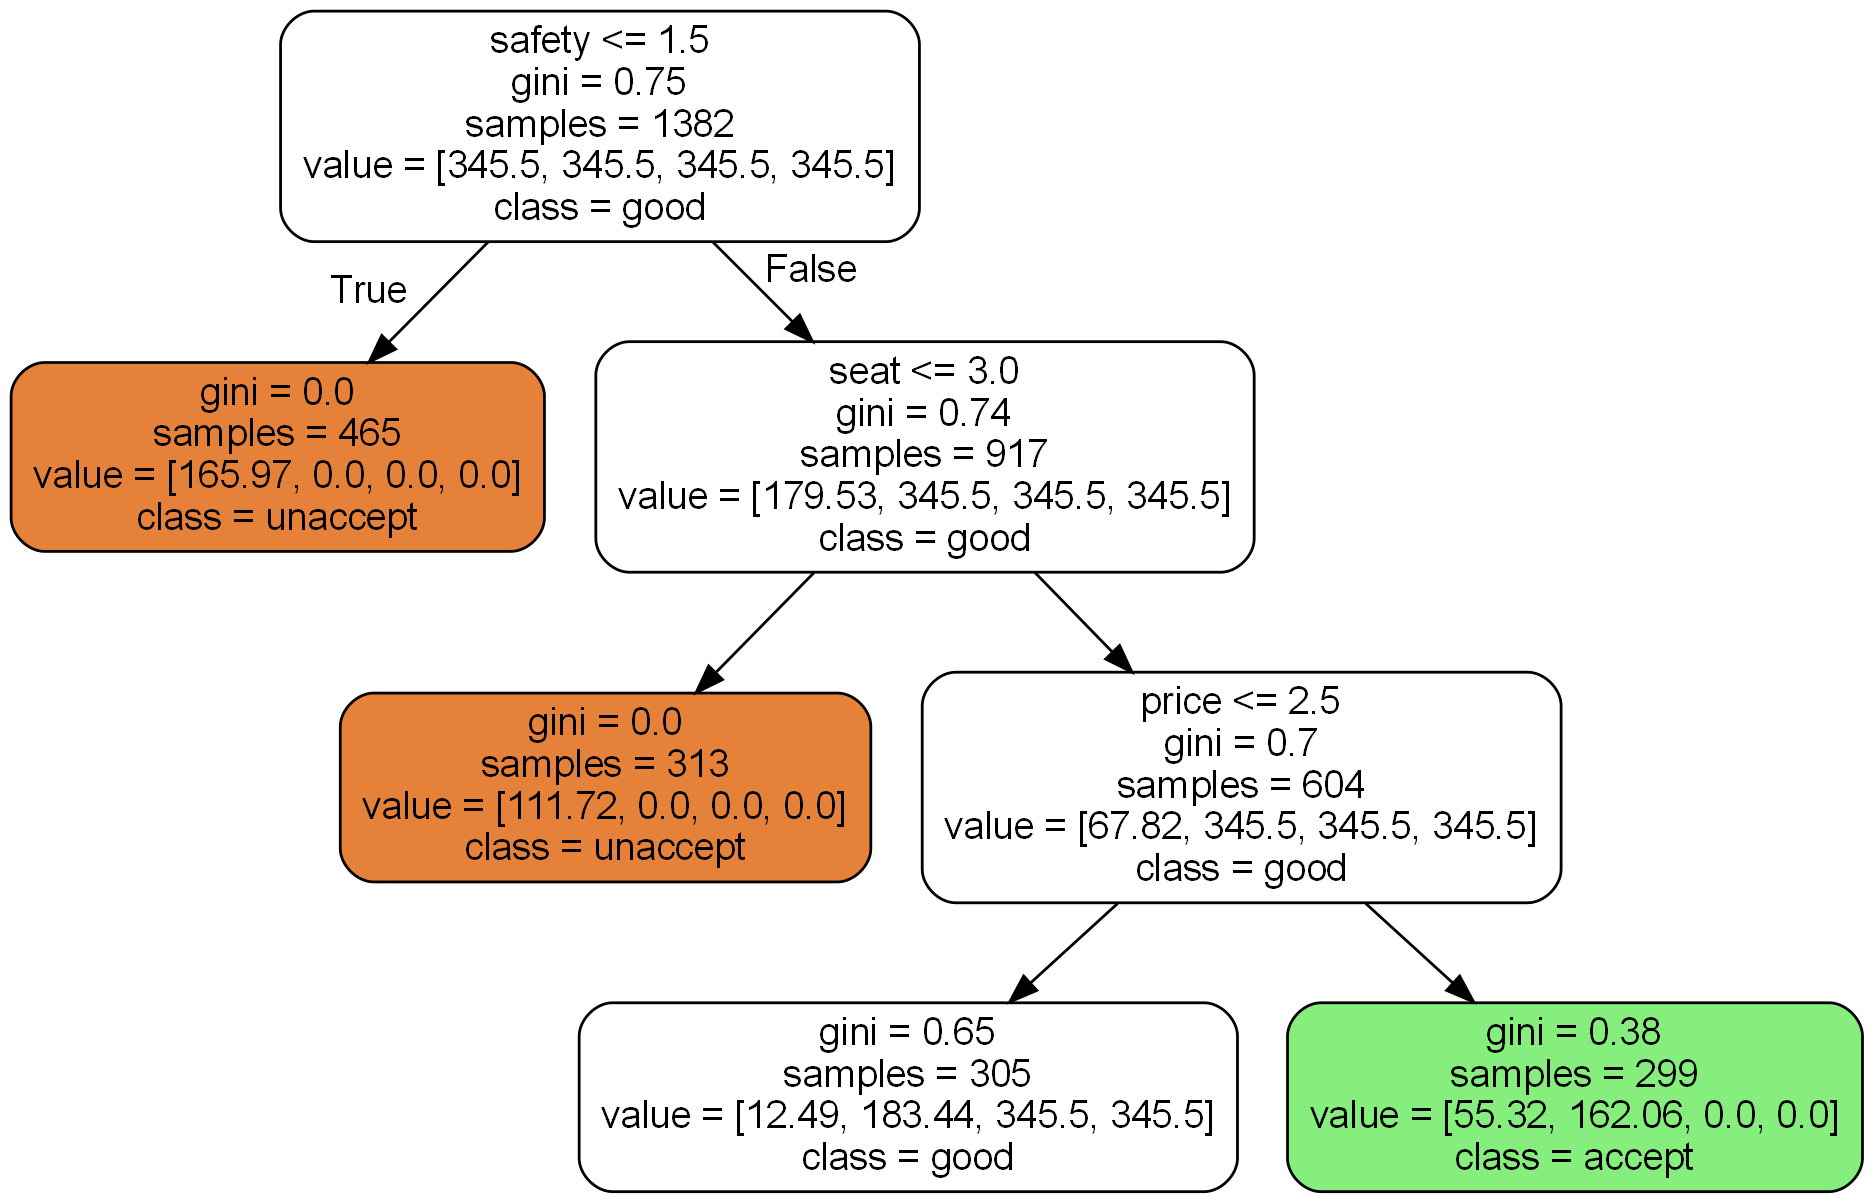

In [28]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'depth3decisiontree.png', '-Gdpi=200'])

from IPython.display import Image
Image(filename = 'depth3decisiontree.png')